# cone sphere intersection

$(r-r_0) \cdot n = |r - r_0| \cos{\theta_{C_s}}$

$r = R (\sin{\theta}\cos{\phi} \hat{x} + \sin{\theta}\sin{\phi} \hat{y} + \cos{\theta} \hat{z} $

$(R \sin{\theta} \cos{\phi} - x_0) n_x + (R \sin{\theta} \sin{\phi}- y_0) n_y + (R \cos{\theta} - z_0) n_z = \cos{\theta_{C_s}} \bigg((R \sin{\theta} \cos{\phi} - x_0)^2 + (R \sin{\theta} \sin{\phi}- y_0)^2 + (R \cos{\theta} - z_0)^2\bigg)^{\frac{1}{2}} $

f = $(R \sin{\theta} \cos{\phi} - x_0) n_x + (R \sin{\theta} \sin{\phi}- y_0) n_y + (R \cos{\theta} - z_0) n_z - \bigg((R \sin{\theta} \cos{\phi} - x_0)^2 + (R \sin{\theta} \sin{\phi}- y_0)^2 + (R \cos{\theta} - z_0)^2\bigg)^{\frac{1}{2}} \\\cos{\theta_{C_s}} = 0 $

$error = ((\frac{\partial f}{\partial \theta} \Delta \theta )^2 + (\frac{\partial f}{\partial \phi} \Delta \phi )^2)^{\frac{1}{2}}$

# find cone-sphere intersection curves

We just use following functions to make data:
random_initializing, space, cone_sphere_intersection_with_error, data_genarate_with_error_random

In [1]:
import numpy as np
import matplotlib.pylab as plt
from math import cos as cos
from math import sin as sin
from math import pi as pi
import math
import pandas as pd
from PIL import Image # save data as image

In [2]:
def random_initializing():
    '''
    set a random cone's parameters
    return : R_0 = (x_0,y_0,z_0),n = (n_x,n_y,n_z),thta_cs
    
    '''
    theta_cs = np.random.uniform(0,pi/2)
    theta = np.random.uniform(0,pi)
    phi = np.random.uniform(0,2*pi)
    x_0 = np.random.uniform(-1,1)
    y_0 = np.random.uniform(-1,1)
    z_0 = np.random.uniform(-1,1)
    n_x = sin(theta) * cos(phi) 
    n_y = sin(theta) * sin(phi) 
    n_z = cos(theta) 
    
    while ~(np.cross([x_0,y_0,z_0] , [n_x,n_y,n_z]).any()): # to dont generate circle intersections
        theta_cs = np.random.uniform(0,pi/2)
        theta = np.random.uniform(0,pi)
        phi = np.random.uniform(0,2*pi)
        x_0 = np.random.uniform(-1,1)
        y_0 = np.random.uniform(-1,1)
        z_0 = np.random.uniform(-1,1)
        n_x = sin(theta) * cos(phi) 
        n_y = sin(theta) * sin(phi) 
        n_z = cos(theta)
    
    return x_0,y_0,z_0,theta_cs,n_x,n_y,n_z

In [3]:
def initializing(theta,phi,x_0,y_0,z_0,theta_c):
    '''
    set a cone's parameters
    input : theta and phi (degree) for direction vector
                n_x = sin(theta) cos(phi)
                n_y = sin(theta) sin(phi)
                n_z = cos(theta)
            theta_cs(degree)
            
    return : R_0 = (x_0,y_0,z_0),n = (n_x,n_y,n_z),thta_cs(radian)
    
    '''
    
    theta_n = (theta / 180) * pi
    phi_n = (phi / 180) * pi
    theta_cs = (theta_c / 180) * pi 
    #Cone's pointing vector
    n_x = sin(theta_n) * cos(phi_n) 
    n_y = sin(theta_n) * sin(phi_n) 
    n_z = cos(theta_n) 
    
    return x_0,y_0,z_0,theta_cs,n_x,n_y,n_z

In [4]:
def space(mesh_theta,mesh_phi):
    '''
    discrete the parameter space: divide theta into (mesh_theta = N_theta = pi / delta_theta) parts
                                  divide phi into (mesh_phi = N_phi = 2 pi / delta_phi) parts
    return: a mesh_theta*mesh_phi dimension matrix wich its elements are theta,phi of that point
    
    '''
    #Meshgrid
    phi = np.linspace(0, 2*pi , mesh_phi)
    theta = np.linspace(0, pi , mesh_theta)
    phi_s, theta_s = np.meshgrid(phi,theta)
    return phi_s,theta_s

In [5]:
def cone_sphere_intersection(x_0,y_0,z_0,theta_cs,n_x,n_y,n_z,phi_s,theta_s,error):
    '''
    find intersection curve's points numerically(with a constant error) and show them with a matrix which its nonzero(1) elements are intersection points
    input : x_0,y_0,z_0,theta_cs,n_x,n_y,n_z : cone parameters
            phi_s,theta_s : from "space" function - discrete parameter space
            error : the threshold for flagging and element as a intersection point
    return : a mesh_theta*mesh_phi dimension matrix which its nonzero(1) elements are intersection points
    
    '''
    
    sin_theta = np.sin(theta_s)
    cos_theta = np.cos(theta_s) 
    sin_phi = np.sin(phi_s)
    cos_phi = np.cos(phi_s)
    
    X = sin_theta * cos_phi - x_0
    Y = sin_theta * sin_phi - y_0
    Z = cos_theta - z_0
    
    function = X * n_x + Y * n_y + Z * n_z - (X**2 + Y**2 + Z**2)**0.5 * np.cos(theta_cs)
    function[abs(function) <= error] = 0
    function[function != 0] = -1
    function = function + 1
    
    return function

In [6]:
def cone_sphere_intersection_with_error(x_0,y_0,z_0,theta_cs,n_x,n_y,n_z,phi_s,theta_s,mesh_theta,mesh_phi):
    '''
    find intersection curve's points numerically(by finding error for all possible theta and phi) and show them with a matrix which its nonzero(1) elements are intersection points
    input : x_0,y_0,z_0,theta_cs,n_x,n_y,n_z : cone parameters
            phi_s,theta_s : from "space" function - discrete parameter space
            mesh_theta,mesh_phi : they use for calculate the error (find delta_theta and delta_phi)
    return : a mesh_theta*mesh_phi dimension matrix which its nonzero(1) elements are intersection points
    
    '''
    
    delta_theta = pi / mesh_theta
    delta_phi = 2 * pi / mesh_phi
    
    sin_theta = np.sin(theta_s)
    cos_theta = np.cos(theta_s) 
    sin_phi = np.sin(phi_s)
    cos_phi = np.cos(phi_s)
    
    X = sin_theta * cos_phi - x_0
    Y = sin_theta * sin_phi - y_0
    Z = cos_theta - z_0
    rsize = np.sqrt(X**2 + Y**2 + Z**2)
    
    function = X * n_x + Y * n_y + Z * n_z - np.multiply(rsize,np.cos(theta_cs))
    
    deltaf_deltatheta = cos_theta * (cos_phi * n_x + sin_phi * n_y) - sin_theta * n_z + np.cos(theta_cs) * np.divide((cos_theta * (cos_phi * x_0 + sin_phi * y_0) - sin_theta * z_0) , rsize)
    deltaf_deltaphi = sin_theta * (cos_phi * n_y - sin_phi * n_x) + np.cos(theta_cs) * sin_theta * np.divide((cos_phi * y_0 - sin_phi * x_0) , rsize)
    error_function = np.sqrt(np.add(np.multiply(deltaf_deltaphi,deltaf_deltaphi) * (delta_phi) ** 2,np.multiply(deltaf_deltatheta,deltaf_deltatheta) * (delta_theta) ** 2))
    
    function[abs(function) <= error_function] = 0
    function[abs(function) != 0] = -1
    function = function + 1
    
    if function.any() == 0:
        theta_cs = -1 # for cones which have no interaction
    
    return function, theta_cs

In [7]:
def cone_sphere_intersection_for_cone(x_0,y_0,z_0,theta_cs,n_x,n_y,n_z,phi_s,theta_s,error):
    '''
    find intersection curve's points numerically(with a constant error) and show them with a matrix which its nonzero(1) elements are intersection points
    input : x_0,y_0,z_0,theta_cs,n_x,n_y,n_z : cone parameters
            phi_s,theta_s : from "space" function - discrete parameter space
            error : the threshold for flagging and element as a intersection point
    return : a mesh_theta*mesh_phi dimension matrix which its nonzero(1) elements are intersection points
    
    '''
    
    sin_theta = np.sin(theta_s)
    cos_theta = np.cos(theta_s) 
    sin_phi = np.sin(phi_s)
    cos_phi = np.cos(phi_s)
    
    X = sin_theta * cos_phi 
    Y = sin_theta * sin_phi 
    Z = cos_theta 
    
    function = X * n_x + Y * n_y + Z * n_z - np.cos(theta_cs)
    function[abs(function) <= error] = 0
    function[function != 0] = -1
    function = function + 1
    
    return function

In [8]:
def data_genarate_for_cone(error,mesh_theta,mesh_phi,theta,phi,x_0,y_0,z_0,theta_c):
    '''
    find intersection curve's points numerically(with a constant error) and show them with a matrix which its nonzero(1) elements are intersection points
    input : error : the threshold for flagging and element as a intersection point
            mesh_theta,mesh_phi : use as input for "space" function
            x_0,y_0,z_0,theta,phi,theta_c : the cone's parameters
    return : intersection :a mesh_theta*mesh_phi dimension matrix which its nonzero(1) elements are intersection points
        
    
    '''
        
    phi_s,theta_s = space(mesh_theta,mesh_phi)
    x_0,y_0,z_0,theta_cs,n_x,n_y,n_z = initializing(theta,phi,x_0,y_0,z_0,theta_c)
    intersection = cone_sphere_intersection_for_cone(x_0,y_0,z_0,theta_cs,n_x,n_y,n_z,phi_s,theta_s,error)
    return intersection

In [9]:
def data_genarate_random(error,mesh_theta,mesh_phi):
    '''
    find intersection curve's points numerically(with a constant error) for a random cone and show them with a matrix which its nonzero(1) elements are intersection points
    input : error : the threshold for flagging and element as a intersection point
            mesh_theta,mesh_phi : use as input for "space" function
    return : intersection :a mesh_theta*mesh_phi dimension matrix which its nonzero(1) elements are intersection points
             x_0,y_0,z_0,theta_cs,n_x,n_y,n_z : the random cone's parameters
    
    '''
    
    phi_s,theta_s = space(mesh_theta,mesh_phi)
    x_0,y_0,z_0,theta_cs,n_x,n_y,n_z = random_initializing()
    intersection = cone_sphere_intersection(x_0,y_0,z_0,theta_cs,n_x,n_y,n_z,phi_s,theta_s,error)
    return intersection,x_0,y_0,z_0,theta_cs,n_x,n_y,n_z

In [10]:
def data_genarate_with_error_random(mesh_theta,mesh_phi,phi_s,theta_s):
    '''
    find intersection curve's points numerically(by finding error for all possible theta and phi) for a random cone and show them with a matrix which its nonzero(1) elements are intersection points
    input :mesh_theta,mesh_phi : they use for calculate the error (find delta_theta and delta_phi)
            phi_s,theta_s : from space() function
    return : intersection :a mesh_theta*mesh_phi dimension matrix which its nonzero(1) elements are intersection points
             x_0,y_0,z_0,theta_cs,n_x,n_y,n_z : the random cone's parameters
    '''
    x_0,y_0,z_0,theta_cs,n_x,n_y,n_z = random_initializing()
    intersection, theta_cs = cone_sphere_intersection_with_error(x_0,y_0,z_0,theta_cs,n_x,n_y,n_z,phi_s,theta_s,mesh_theta,mesh_phi)
    return intersection,x_0,y_0,z_0,theta_cs,n_x,n_y,n_z

In [11]:
def data_genarate(error,mesh_theta,mesh_phi,theta,phi,x_0,y_0,z_0,theta_c):
    '''
    find intersection curve's points numerically(with a constant error) and show them with a matrix which its nonzero(1) elements are intersection points
    input : error : the threshold for flagging and element as a intersection point
            mesh_theta,mesh_phi : use as input for "space" function
            x_0,y_0,z_0,theta,phi,theta_c : the cone's parameters
    return : intersection :a mesh_theta*mesh_phi dimension matrix which its nonzero(1) elements are intersection points
        
    
    '''
        
    phi_s,theta_s = space(mesh_theta,mesh_phi)
    x_0,y_0,z_0,theta_cs,n_x,n_y,n_z = initializing(theta,phi,x_0,y_0,z_0,theta_c)
    intersection = cone_sphere_intersection(x_0,y_0,z_0,theta_cs,n_x,n_y,n_z,phi_s,theta_s,error)
    return intersection

In [12]:
def data_genarate_with_error(mesh_theta,mesh_phi,theta,phi,x_0,y_0,z_0,theta_c):
    '''
    find intersection curve's points numerically(by finding error for all possible theta and phi) and show them with a matrix which its nonzero(1) elements are intersection points
    input :mesh_theta,mesh_phi : they use for calculate the error (find delta_theta and delta_phi)
           x_0,y_0,z_0,theta,phi,theta_c : the cone's parameters
    return : intersection :a mesh_theta*mesh_phi dimension matrix which its nonzero(1) elements are intersection points
             
    '''
    
    phi_s,theta_s = space(mesh_theta,mesh_phi)
    x_0,y_0,z_0,theta_cs,n_x,n_y,n_z = initializing(theta,phi,x_0,y_0,z_0,theta_c)
    intersection = cone_sphere_intersection_with_error(x_0,y_0,z_0,theta_cs,n_x,n_y,n_z,phi_s,theta_s,mesh_theta,mesh_phi)
    return intersection

# creating data

In [22]:
#the intersection matrix dimension
N_size = 500
mesh_theta,mesh_phi = N_size, 2*N_size 
N_samples = 20

In [23]:
%%time
phi_s,theta_s = space(mesh_theta,mesh_phi)

Wall time: 7.34 ms


In [24]:
labels = pd.DataFrame(columns = ['coneID','theta_cs','n_x','n_y','n_z','x_0','y_0','z_0'])

In [25]:
%%time
for i in range (N_samples):
    intersection = np.zeros((mesh_theta,mesh_phi),dtype=bytes)
    intersection,x_0,y_0,z_0,theta_cs,n_x,n_y,n_z = data_genarate_with_error_random(mesh_theta,mesh_phi,phi_s,theta_s)
    while(theta_cs == -1): # dont save cones without intersection
        intersection,x_0,y_0,z_0,theta_cs,n_x,n_y,n_z = data_genarate_with_error_random(mesh_theta,mesh_phi,phi_s,theta_s)
    labels = labels.append({'coneID':int(i+1) , 'theta_cs': theta_cs ,'n_x': n_x,
                            'n_y': n_y ,'n_z': n_z ,'x_0': x_0 ,'y_0': y_0 ,'z_0': z_0 } ,ignore_index=True)
    im = Image.fromarray(intersection.reshape((mesh_theta,mesh_phi)).astype('uint8')*255) # save matrix as black and white image
    im.save(labels['coneID'][i].astype(str)+'.jpg')

Wall time: 2.91 s


In [26]:
# labels.to_csv('labels.csv',index=False)

In [27]:
labels.head()

,coneID,theta_cs,n_x,n_y,n_z,x_0,y_0,z_0
0,1.0,1.528285,0.689681,0.293688,-0.661882,-0.835543,0.614606,-0.985250
1,2.0,0.497786,0.809610,-0.184692,0.557155,-0.535838,0.170713,-0.202396
2,3.0,1.023870,-0.438729,0.067702,0.896065,0.709450,0.621432,0.512969
3,4.0,0.993477,0.139168,0.330548,-0.933472,0.208993,-0.309915,0.122158
4,5.0,0.365879,0.675099,-0.634149,-0.376956,0.237389,0.253514,0.836600


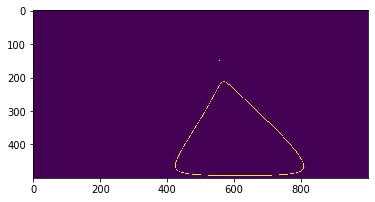

In [34]:
# example 
test = Image.open('9.0.jpg')
plt.imshow(test)